# Plot maps with lat long markers and ESRI shaded relief background

ESRI copyright conditions:
https://www.esri.com/en-us/legal/copyright-proprietary-rights

Use for research is ok, but copyright maintains with ESRI. Thus cannot be published in some open-access journals like PLoS where they require you to sign over the copyright of all material.

An overview of all background tiles that can be used with minor changes to this script: https://leaflet-extras.github.io/leaflet-providers/preview/

## Load dependencies

If it says package not available, look for it at anaconda.org and install

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import pandas as pd
import numpy as np
from pathlib import Path
from cartopy.io.img_tiles import GoogleTiles

# this next magic line plots the maps in the notebook
%matplotlib inline

## Create a class to download ESRI background image

In [2]:
class ShadedReliefESRI(GoogleTiles):
    # shaded relief
    def _image_url(self, tile):
        x, y, z = tile
        url = ('https://server.arcgisonline.com/ArcGIS/rest/services/' \
               'World_Shaded_Relief/MapServer/tile/{z}/{y}/{x}.jpg').format(
               z=z, y=y, x=x)
        return url

## Function to plot map of main HI islands, plot markers, and save to file

In [3]:
def esrimap(dflatlong):
    data_crs = ccrs.PlateCarree() # data to plot is in lat/lon coordinate system
    fig = plt.figure(figsize=(5, 5), dpi= 300, edgecolor='white')
    ax = plt.axes(projection=ShadedReliefESRI().crs, frame_on=False)
    # get bounding box coords here: http://boundingbox.klokantech.com, select 'dublincore'
    ax.set_extent([-160.75, -154.64, 18.78, 22.4]) # minx (westlimit), maxx (eastlimit), miny (southlimit), maxy (northlimit)
    ax.add_image(ShadedReliefESRI(), 8) # the number is the zoom level (resolution), adjust as needed
    
    # plot points
    listlat = list(dflatlong['decimallatitude'])
    listlong = list(dflatlong['decimallongitude'])
    if listlat: # returns true if the latitude list is not empty and runs the next line
        ax.plot(listlong, listlat, transform=data_crs,
                marker='^',
                color='#f1a340',
                markersize=3,
                zorder=27,
                linestyle='None',
                markeredgewidth=.2,
                markeredgecolor='black',
                alpha=.8)

    # Save to file. If the next lines are active it won't plot the map in the notebook)
    #plt.savefig("mymap.png", dpi=600, bbox_inches="tight")
    #plt.savefig("mymap.pdf", format="pdf", bbox_inches="tight")
    #plt.close('all')

## Import csv file with lat long data into pandas dataframe and run mapping function

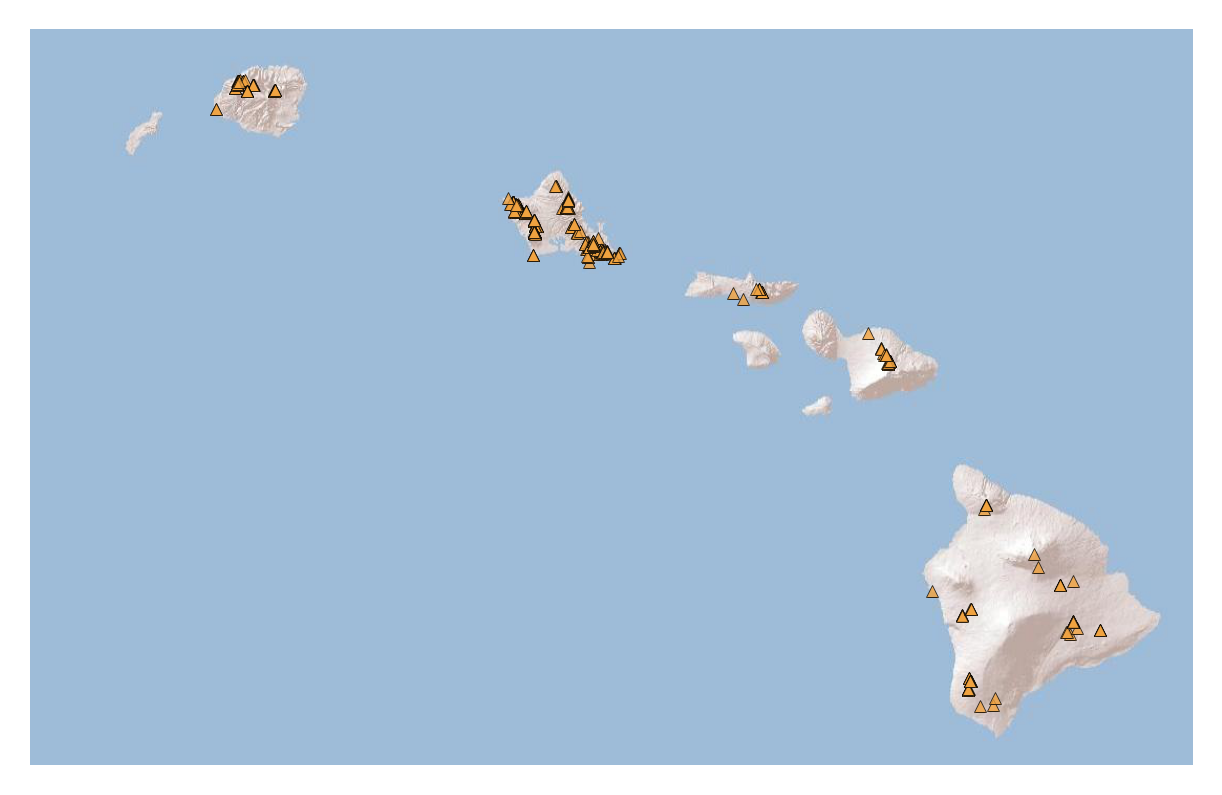

In [4]:
dflatlong = pd.read_csv("example_localitydata.csv", header=0) #header = 0 means the first row is a header row, python starts counting at 0

try:
    esrimap(dflatlong)
except Exception as e:
    print(e)
    pass

## Same function except only mapping Oʻahu and different zoom

In [5]:
def esrimapoahu(dflatlong):
    data_crs = ccrs.PlateCarree() # data to plot is in lat/lon coordinate system
    fig = plt.figure(figsize=(5, 5), dpi= 300, edgecolor='white')
    ax = plt.axes(projection=ShadedReliefESRI().crs, frame_on=False)
    # Get bounding box coords here: http://boundingbox.klokantech.com, select 'dublincore'
    # westlimit=-158.287422; southlimit=21.242186; eastlimit=-157.63006; northlimit=21.716784
    ax.set_extent([-158.29, -157.63, 21.24, 21.72]) # minx (westlimit), maxx (eastlimit), miny (southlimit), maxy (northlimit)
    ax.add_image(ShadedReliefESRI(), 11) # the number is the zoom level (resolution), adjust as needed
    
    # plot points
    listlat = list(dflatlong['decimallatitude'])
    listlong = list(dflatlong['decimallongitude'])
    if listlat: # returns true if the latitude list is not empty and runs the next line
        ax.plot(listlong, listlat, transform=data_crs,
                marker='^',
                color='#f1a340',
                markersize=3,
                zorder=27,
                linestyle='None',
                markeredgewidth=.2,
                markeredgecolor='black',
                alpha=.8)
    
    # Save to file. If the next lines are active it won't plot the map in the notebook)
    #plt.savefig("mymap.png", dpi=600, bbox_inches="tight")
    #plt.savefig("mymap.pdf", format="pdf", bbox_inches="tight")
    #plt.close('all')

## Import csv file with lat long data into pandas dataframe and run mapping function for Oʻahu

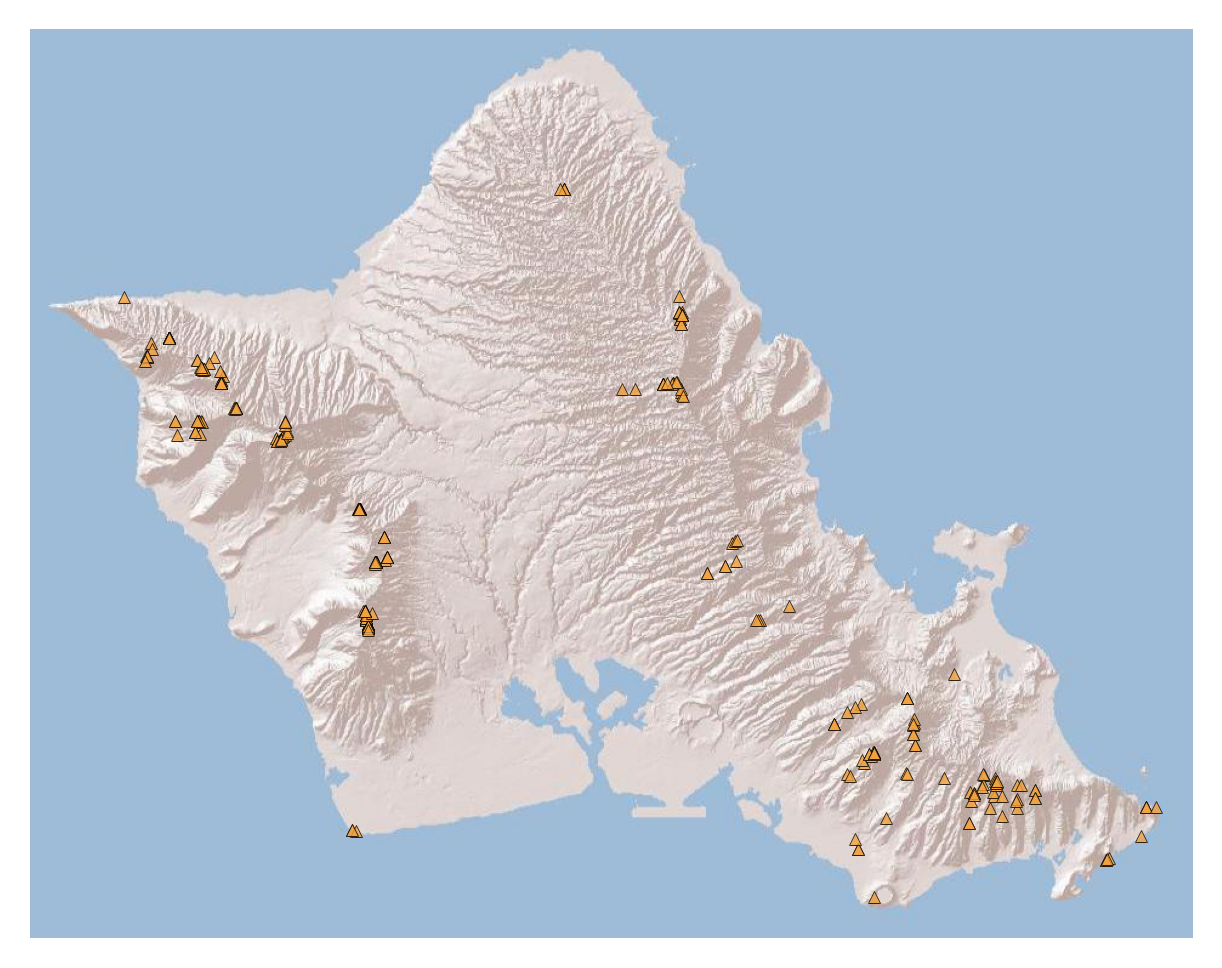

In [6]:
dflatlong = pd.read_csv("example_localitydata.csv", header=0) #header = 0 means the first row is a header row, python starts counting at 0

try:
    esrimapoahu(dflatlong)
except Exception as e:
    print(e)
    pass